<a href="https://colab.research.google.com/github/garrysawyers3007/Age-Classification/blob/main/Age_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade fastai >./tmp
from fastai.vision.all import *

In [2]:
import numpy as np
from PIL import Image

In [3]:
path = Path('/content/drive/MyDrive/human-age-recognition')#Change accordingly
path.ls()

(#5) [Path('/content/drive/MyDrive/human-age-recognition/Sample Submission.csv'),Path('/content/drive/MyDrive/human-age-recognition/train.csv'),Path('/content/drive/MyDrive/human-age-recognition/test'),Path('/content/drive/MyDrive/human-age-recognition/train'),Path('/content/drive/MyDrive/human-age-recognition/models')]

In [4]:
root = path/'train'/'train'
files = get_image_files(root)
files

(#10707) [Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001147.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001153.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001139.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001133.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001071.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001137.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001109.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001099.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001092.jpg'),Path('/content/drive/MyDrive/human-age-recognition/train/train/1/00001039(1).jpg')...]

In [5]:
import albumentations
class AlbumentationsTransform(DisplayedTransform):
    split_idx,order=0,2
    def __init__(self, train_aug): store_attr()
    
    def encodes(self, img: PILImage):
        aug_img = self.train_aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

def get_train_aug(): return albumentations.Compose([
            albumentations.Flip(), 
            albumentations.HorizontalFlip(),
            albumentations.VerticalFlip(),
            albumentations.Rotate(),
            albumentations.Blur()
])
item_tfms = [Resize(224), AlbumentationsTransform(get_train_aug())]

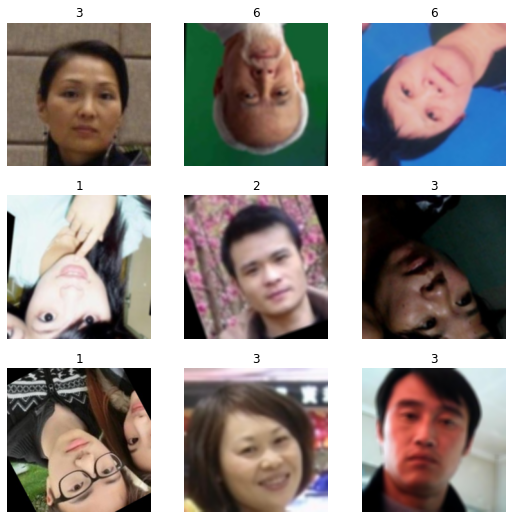

In [6]:
dls = ImageDataLoaders.from_path_func(path,files,label_func=parent_label, val_bs = 32, item_tfms=item_tfms)#Actual size (390, 304)
dls.show_batch()

In [7]:
base_arch = densenet121
learn = cnn_learner(dls, base_arch, metrics=accuracy)
#learn.lr_find(start_lr=1e-8, end_lr=1)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
lr=1e-3
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,3.159200,2.231892,0.206913,17:24
1,2.824466,1.949858,0.296123,03:03
2,2.523014,1.838899,0.345633,03:03
3,2.241718,1.739427,0.344232,03:03
4,2.071408,1.612719,0.390005,03:03
5,1.865609,1.535527,0.375993,03:03
6,1.702926,1.490631,0.387202,03:03
7,1.599905,1.469395,0.399813,03:03
8,1.532907,1.412250,0.409622,03:03
9,1.459922,1.378134,0.411490,03:03


In [ ]:
learn.save('/content/drive/MyDrive/densenet-121')

Path('/content/drive/MyDrive/densenet-121.pth')

In [8]:
learn.load('/content/drive/MyDrive/densenet-121')

SuggestedLRs(lr_min=1.0471285349922254e-08, lr_steep=5.248074685937354e-08)

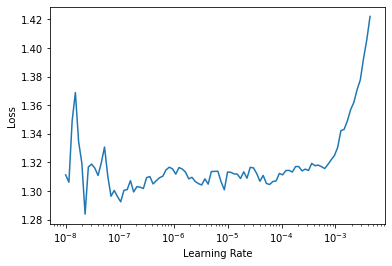

In [ ]:
learn.unfreeze()
learn.lr_find(start_lr=1e-8, end_lr=1e-2)

In [ ]:
lr=1e-3
lrs = slice(3e-5,lr/5)
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,accuracy,time
0,1.286057,1.217782,0.491359,03:39
1,1.288546,1.225749,0.484353,03:38
2,1.260916,1.225679,0.478748,03:38
3,1.200930,1.182307,0.494162,03:38
4,1.150097,1.165736,0.490425,03:38
5,1.099596,1.149667,0.494629,03:38
6,1.044775,1.139926,0.501168,03:38
7,1.023565,1.139310,0.498365,03:38
8,0.999942,1.135860,0.510042,03:38
9,0.976967,1.132231,0.503036,03:38


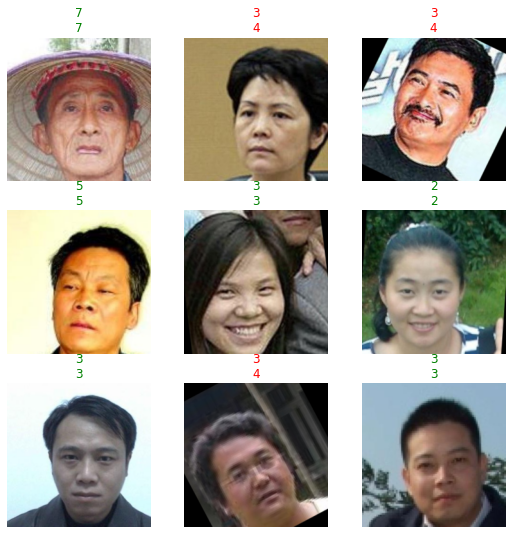

In [9]:
learn.show_results()

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

In [12]:
interp.most_confused(min_val=2)

[('2', '3', 126),
 ('3', '2', 122),
 ('4', '3', 102),
 ('1', '2', 81),
 ('3', '4', 45),
 ('5', '4', 35),
 ('4', '5', 33),
 ('6', '5', 23),
 ('2', '1', 22),
 ('4', '2', 19),
 ('1', '0', 16),
 ('5', '3', 15),
 ('0', '1', 14),
 ('6', '7', 13),
 ('1', '3', 12),
 ('5', '6', 11),
 ('2', '4', 9),
 ('7', '6', 9),
 ('3', '1', 8),
 ('3', '5', 6),
 ('6', '4', 6),
 ('5', '2', 5),
 ('5', '7', 4),
 ('0', '2', 3),
 ('1', '4', 2),
 ('1', '5', 2),
 ('4', '7', 2),
 ('7', '5', 2)]

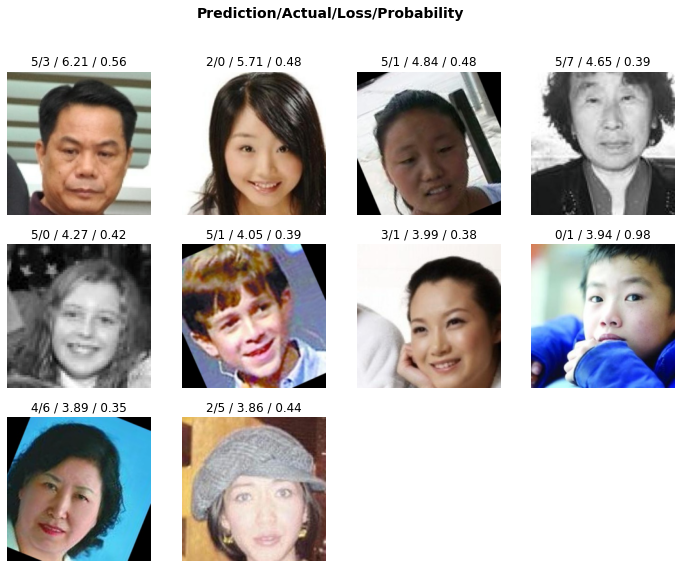

In [15]:
interp.plot_top_losses(10)

In [13]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       178
           1       0.72      0.51      0.60       229
           2       0.62      0.70      0.66       536
           3       0.56      0.65      0.60       514
           4       0.61      0.49      0.54       307
           5       0.62      0.61      0.62       181
           6       0.78      0.64      0.70       120
           7       0.77      0.86      0.81        76

    accuracy                           0.65      2141
   macro avg       0.70      0.67      0.68      2141
weighted avg       0.65      0.65      0.65      2141



In [ ]:
test_path = path/'test'/'test_'
test_files = get_image_files(test_path)

In [ ]:
test_files

(#2674) [Path('/content/drive/MyDrive/human-age-recognition/test/test_/00006585.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00006210.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00005955.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00005905.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00004550.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00005365.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00006615.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00006285.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/00005885.jpg'),Path('/content/drive/MyDrive/human-age-recognition/test/test_/0000535.jpg')...]

In [ ]:
im = Image.open(test_files[0])
im = im.resize((224, 224))
int(learn.predict(test_files[0])[0])

6

In [ ]:
import pandas as pd
df  = pd.read_csv('/content/drive/MyDrive/human-age-recognition/Sample Submission.csv')
df.head()

,Image Name,Labels
0,00009470.jpg,0
1,000010375.jpg,0
2,00002135.jpg,0
3,00009580.jpg,0
4,00002045.jpg,0


In [ ]:
for index,row in df.iterrows():
  path = test_path/row['Image Name']
  df.at[index, 'Labels'] = int(learn.predict(path)[0])

In [ ]:
df.to_csv('Submission.csv', index=False)